# CAPSTONE 2: Strategi Optimalisasi Kampanye Pemasaran dan Peningkatan Retensi Pelanggan Berdasarkan Analisis Perilaku dan Preferensi Pembelian

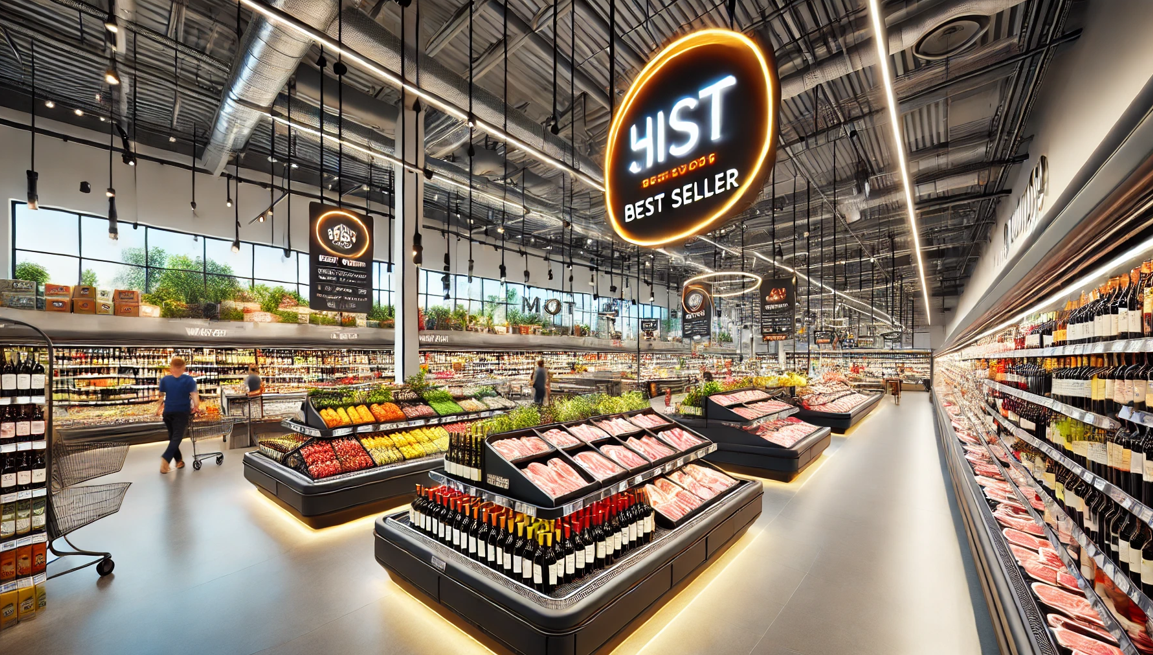](attachment:image.png)

## 1. Introduction

### Context
Dalam industri ritel, memahami perilaku pelanggan sangat penting untuk merancang strategi pemasaran yang efektif. Dengan data yang akurat mengenai preferensi dan kebiasaan pembelian, perusahaan dapat menyusun kampanye yang lebih tepat sasaran dan relevan bagi setiap segmen pelanggan. Hal ini tidak hanya meningkatkan keterlibatan dan penjualan, tetapi juga memperkuat retensi pelanggan melalui program loyalitas yang disesuaikan dengan kebutuhan mereka. Pada akhirnya, pemahaman yang lebih mendalam tentang perilaku pelanggan akan mendorong pertumbuhan bisnis yang berkelanjutan.

### Stakeholder
Marketing Directors: Bertanggung jawab atas pengawasan strategi pemasaran dan pengambilan keputusan.

### Problem Statement
Bagaimana strategi mengoptimalkan kampanye pemasaran untuk meningkatkan keterlibatan, jumlah penjualan produk, serta memperbaiki retensi pelanggan?
* Mengidentifikasi strategi kampanye yanng paling efektif.
* Mengidentifikasi data pelanggan dan pola perilaku pembelian.
* Menganalisis preferensi pelanggan terhadap saluran pembelian.

## 2. Data Understanding

Dataset ini berisi tentang informasi transaksi dan demografi setiap pelanggan di suatu superstore di tahun 2012-2014 dengan total 2240 data termuat dalam 29 kolom. Berikut merupakan informasi yang termuat dalam kolom-kolom tersebut.

| **Kolom**             | **Deskripsi**                                             |
|-----------------------|----------------------------------------------------------|
| ID                    | Identifikasi unik pelanggan                               |
| Year_Birth            | Tahun kelahiran pelanggan                                 |
| Education             | Tingkat pendidikan pelanggan                              |
| Marital_Status        | Status pernikahan pelanggan                               |
| Income                | Pendapatan tahunan rumah tangga pelanggan                 |
| Kidhome               | Jumlah anak di rumah tangga pelanggan                     |
| Teenhome              | Jumlah remaja di rumah tangga pelanggan                   |
| Dt_Customer           | Tanggal pendaftaran pelanggan dengan perusahaan           |
| Recency               | Jumlah hari sejak pembelian terakhir oleh pelanggan       |
| Complain              | 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak |
| MntWines              | Jumlah pembelian produk wine dalam 2 tahun terakhir|
| MntFruits             | Jumlah pembelian produk buah-buahan dalam 2 tahun terakhir |
| MntMeatProducts       | Jumlah pembelian produk daging dalam 2 tahun terakhir |
| MntFishProducts       | Jumlah pembelian produk ikan dalam 2 tahun terakhir |
| MntSweetProducts      | Jumlah pembelian produk manisan dalam 2 tahun terakhir |
| MntGoldProds          | Jumlah pembelian produk emas dalam 2 tahun terakhir  |
| NumDealsPurchases     | Jumlah pembelian yang dilakukan dengan diskon             |
| AcceptedCmp1          | 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak |
| AcceptedCmp2          | 1 jika pelanggan menerima penawaran pada kampanye kedua, 0 jika tidak |
| AcceptedCmp3          | 1 jika pelanggan menerima penawaran pada kampanye ketiga, 0 jika tidak |
| AcceptedCmp4          | 1 jika pelanggan menerima penawaran pada kampanye keempat, 0 jika tidak |
| AcceptedCmp5          | 1 jika pelanggan menerima penawaran pada kampanye kelima, 0 jika tidak |
| Response              | 1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak |
| NumWebPurchases       | Jumlah pembelian yang dilakukan melalui situs web perusahaan |
| NumCatalogPurchases   | Jumlah pembelian yang dilakukan menggunakan katalog       |
| NumStorePurchases     | Jumlah pembelian yang dilakukan langsung di toko          |
| NumWebVisitsMonth     | Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir |
| Z_CostContact         | Biaya tetap per kontak dalam kampanye pemasaran           |
| Z_Revenue             | Pendapatan tetap per kontak yang dihasilkan dari kampanye pemasaran |

In [35]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import squarify
from statsmodels.stats.mediation import Mediation
import missingno as msno
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
from scipy.stats import shapiro

In [36]:
# Memuat Dataset
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Memeriksa Kesesuaian Tipe Data

In [37]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [38]:
# Menyesuaikan tipe data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce').dt.strftime('%d-%m-%Y')
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

> Terdapat ketidaksesuaian tipe data kolom 'Dt_Customer', tertera bertipe object, seharusnya bertipe datetime64[ns].

### Menyesuaikan inkonsistensi data

In [39]:
# Memeriksa unique value setiap kolom
listItem = []
for i in df.columns:
    count_unique = df[i].nunique()
    unique_value = df[i].unique()
    listItem.append([i, count_unique, unique_value])

unique_table = pd.DataFrame(data=listItem, columns=['Nama Kolom', 'Jumlah Unique', 'Unique Value'])
unique_table

,Nama Kolom,Jumlah Unique,Unique Value
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


#### Education

In [40]:
# Memeriksa unique value pada kolom Education
df['Education'].value_counts().reset_index()

,Education,count
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


In [41]:
# Menyesuaikan value pada kolom Education
df['Education'] = df['Education'].replace({'2n Cycle': 'Master', 'Graduation': 'Bachelor'})
df['Education'].value_counts().reset_index()

,Education,count
0,Bachelor,1127
1,Master,573
2,PhD,486
3,Basic,54


> Terdapat dua istilah yang merujuk pada hal yang sama.

#### Marital Status

In [42]:
# Memeriksa unique value pada kolom Marital Status
df['Marital_Status'].value_counts().reset_index()

,Marital_Status,count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


In [43]:
df = df[~df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])]
df['Marital_Status'].value_counts().reset_index()

,Marital_Status,count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77


> Terdapat istilah yang merujuk pada nilai yang kurang jelas dengan kuantitas sedikit yang dapat menyebabkan analisis menjadi bias.

#### Response

In [44]:
# Menangangani Inkonsistensi penamaan kolom
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
       'AcceptedCmp6'],
      dtype='object')

> Berdasarkan dictionary kolom data, penamaan 'Response' tidak konsisten.

### Menangani Missing Value 

In [45]:
# Memeriksa adanya missing value
missing_values = df.isnull().sum()
print(f'Kolom dan jumlah missing values di dataset ini adalah: {missing_values[missing_values > 0]}')

Kolom dan jumlah missing values di dataset ini adalah: Income    24
dtype: int64


Pola missing value antar kolom:


<Axes: >

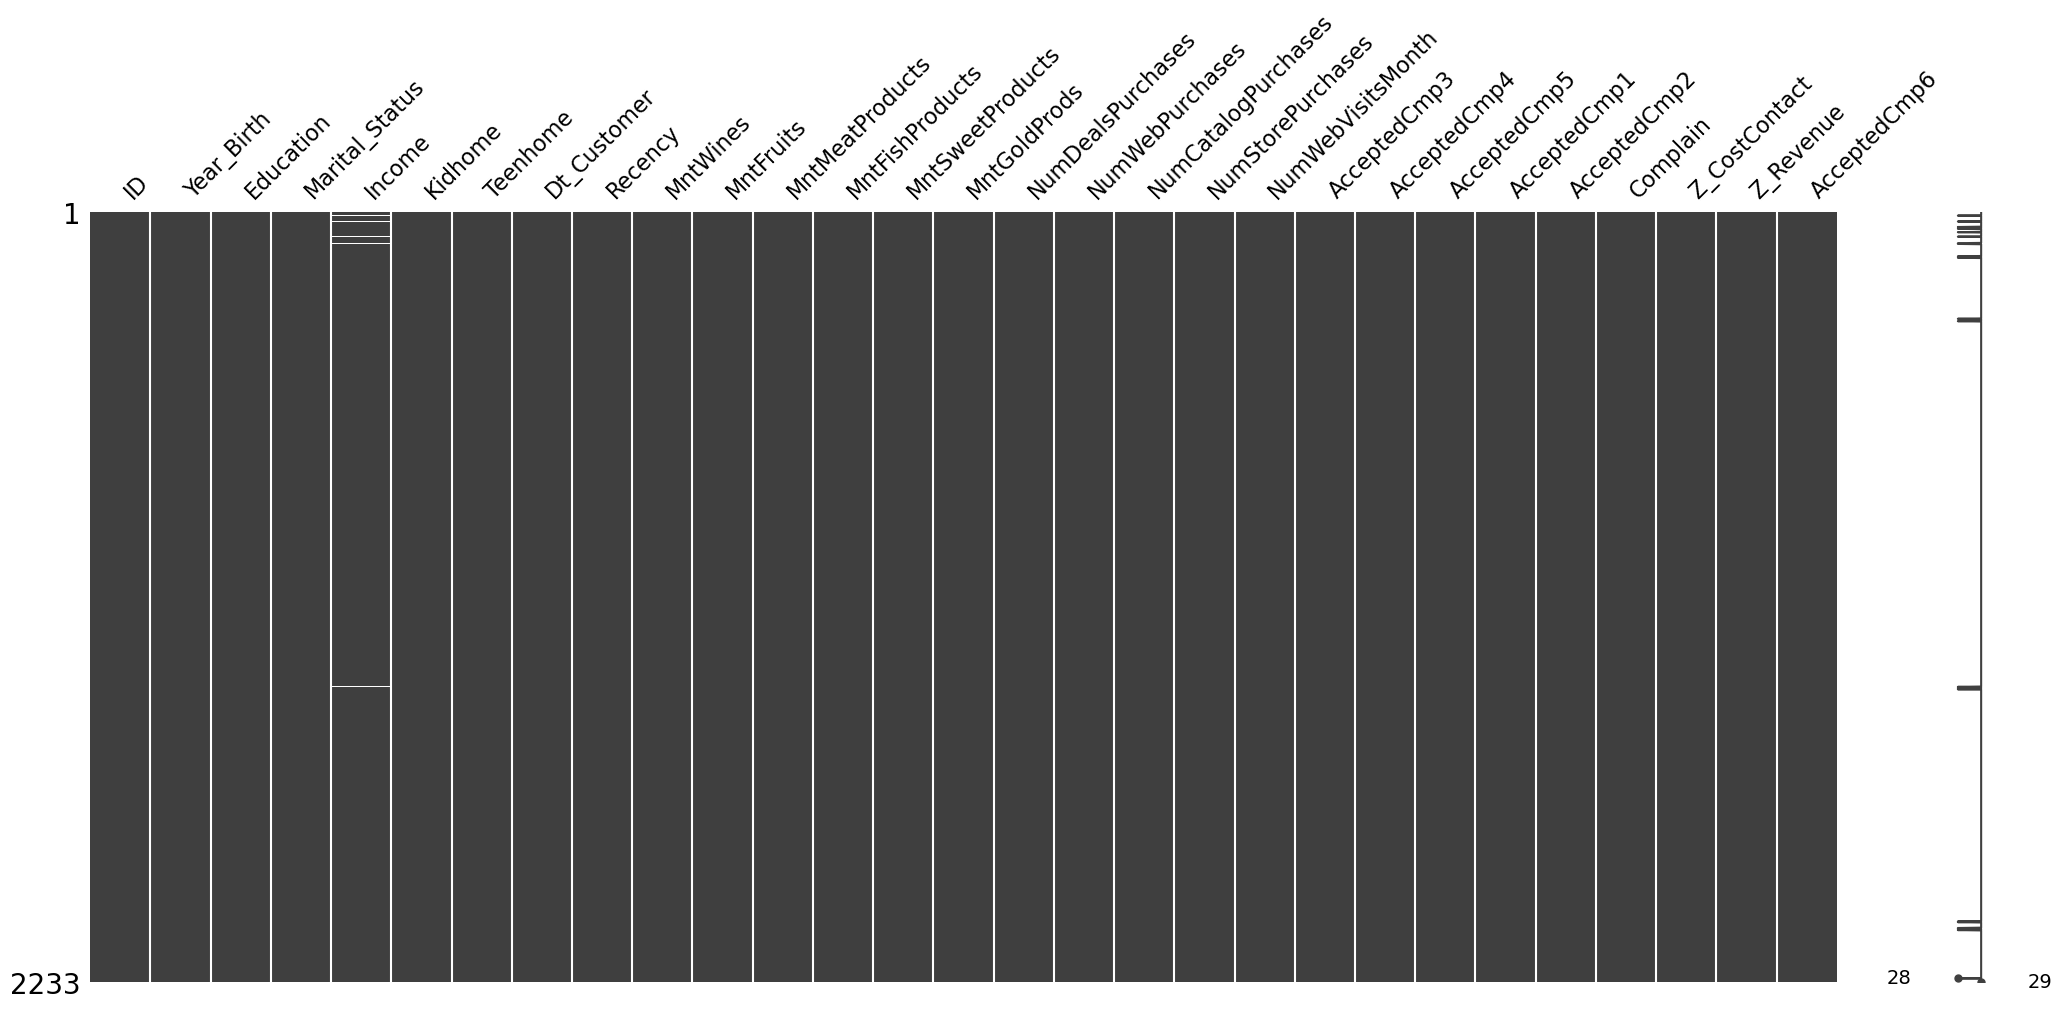

In [46]:
# Melihat pola missing value
print(f'Pola missing value antar kolom:')
msno.matrix(df)

In [47]:
# Menangani missing value
df.dropna(inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
AcceptedCmp6           0
dtype: int64

> Missing value hanya ada di kolom Income dengan proporsinya 1.01% dari 2240 total data, serta tidak memiliki pola hubungan dengan kolom lain, maka baris dengan missing value dapat dihapus.

### Memeriksa Data Duplikat

In [48]:
# Memeriksa adanya data duplikat
print(f"Jumlah data duplikat di Supermarket dataset adalah {df['ID'].duplicated().sum()}")

Jumlah data duplikat di Supermarket dataset adalah 0


> Tidak terdapat data duplikat.

In [49]:
# Menyesuaikan urutan kolom
df=df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
        'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
        'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
        'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']]

### Membuat Kolom Baru

In [50]:
# Melakukan mapping kolom education dan status
df['Order_Edu'] = df['Education'].map({'Primary': 1, 'Secondary': 2, 'Bachelor': 3, 'Master': 4, 'PhD': 5})
df['Order_Status'] = df['Marital_Status'].map( {'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4})

# Membuat kolom Age
df['Age'] = 2014 - df["Year_Birth"]

# Membuat kolom Total Spent (Monetary)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Frequency: Menggunakan jumlah total pembelian sebagai proxy untuk frequency
df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Membuat kolom 'Dependents' untuk status orang tua
df['Dependents'] = df[['Kidhome','Teenhome']].sum(axis=1)

# Membuat kolom Total number of campaigns accepted
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']].sum(axis=1)

# Memilih kolom yang relevan
df = df[['ID', 'Age', 'Order_Edu', 'Order_Status', 'Income', 'Dependents',
                'Dt_Customer', 'Recency', 'Frequency', 'Monetary', 'Complain', 'MntWines',
                'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2',
                'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth', 'TotalAcceptedCmp','Z_CostContact', 'Z_Revenue']]

### Menangani Outliers

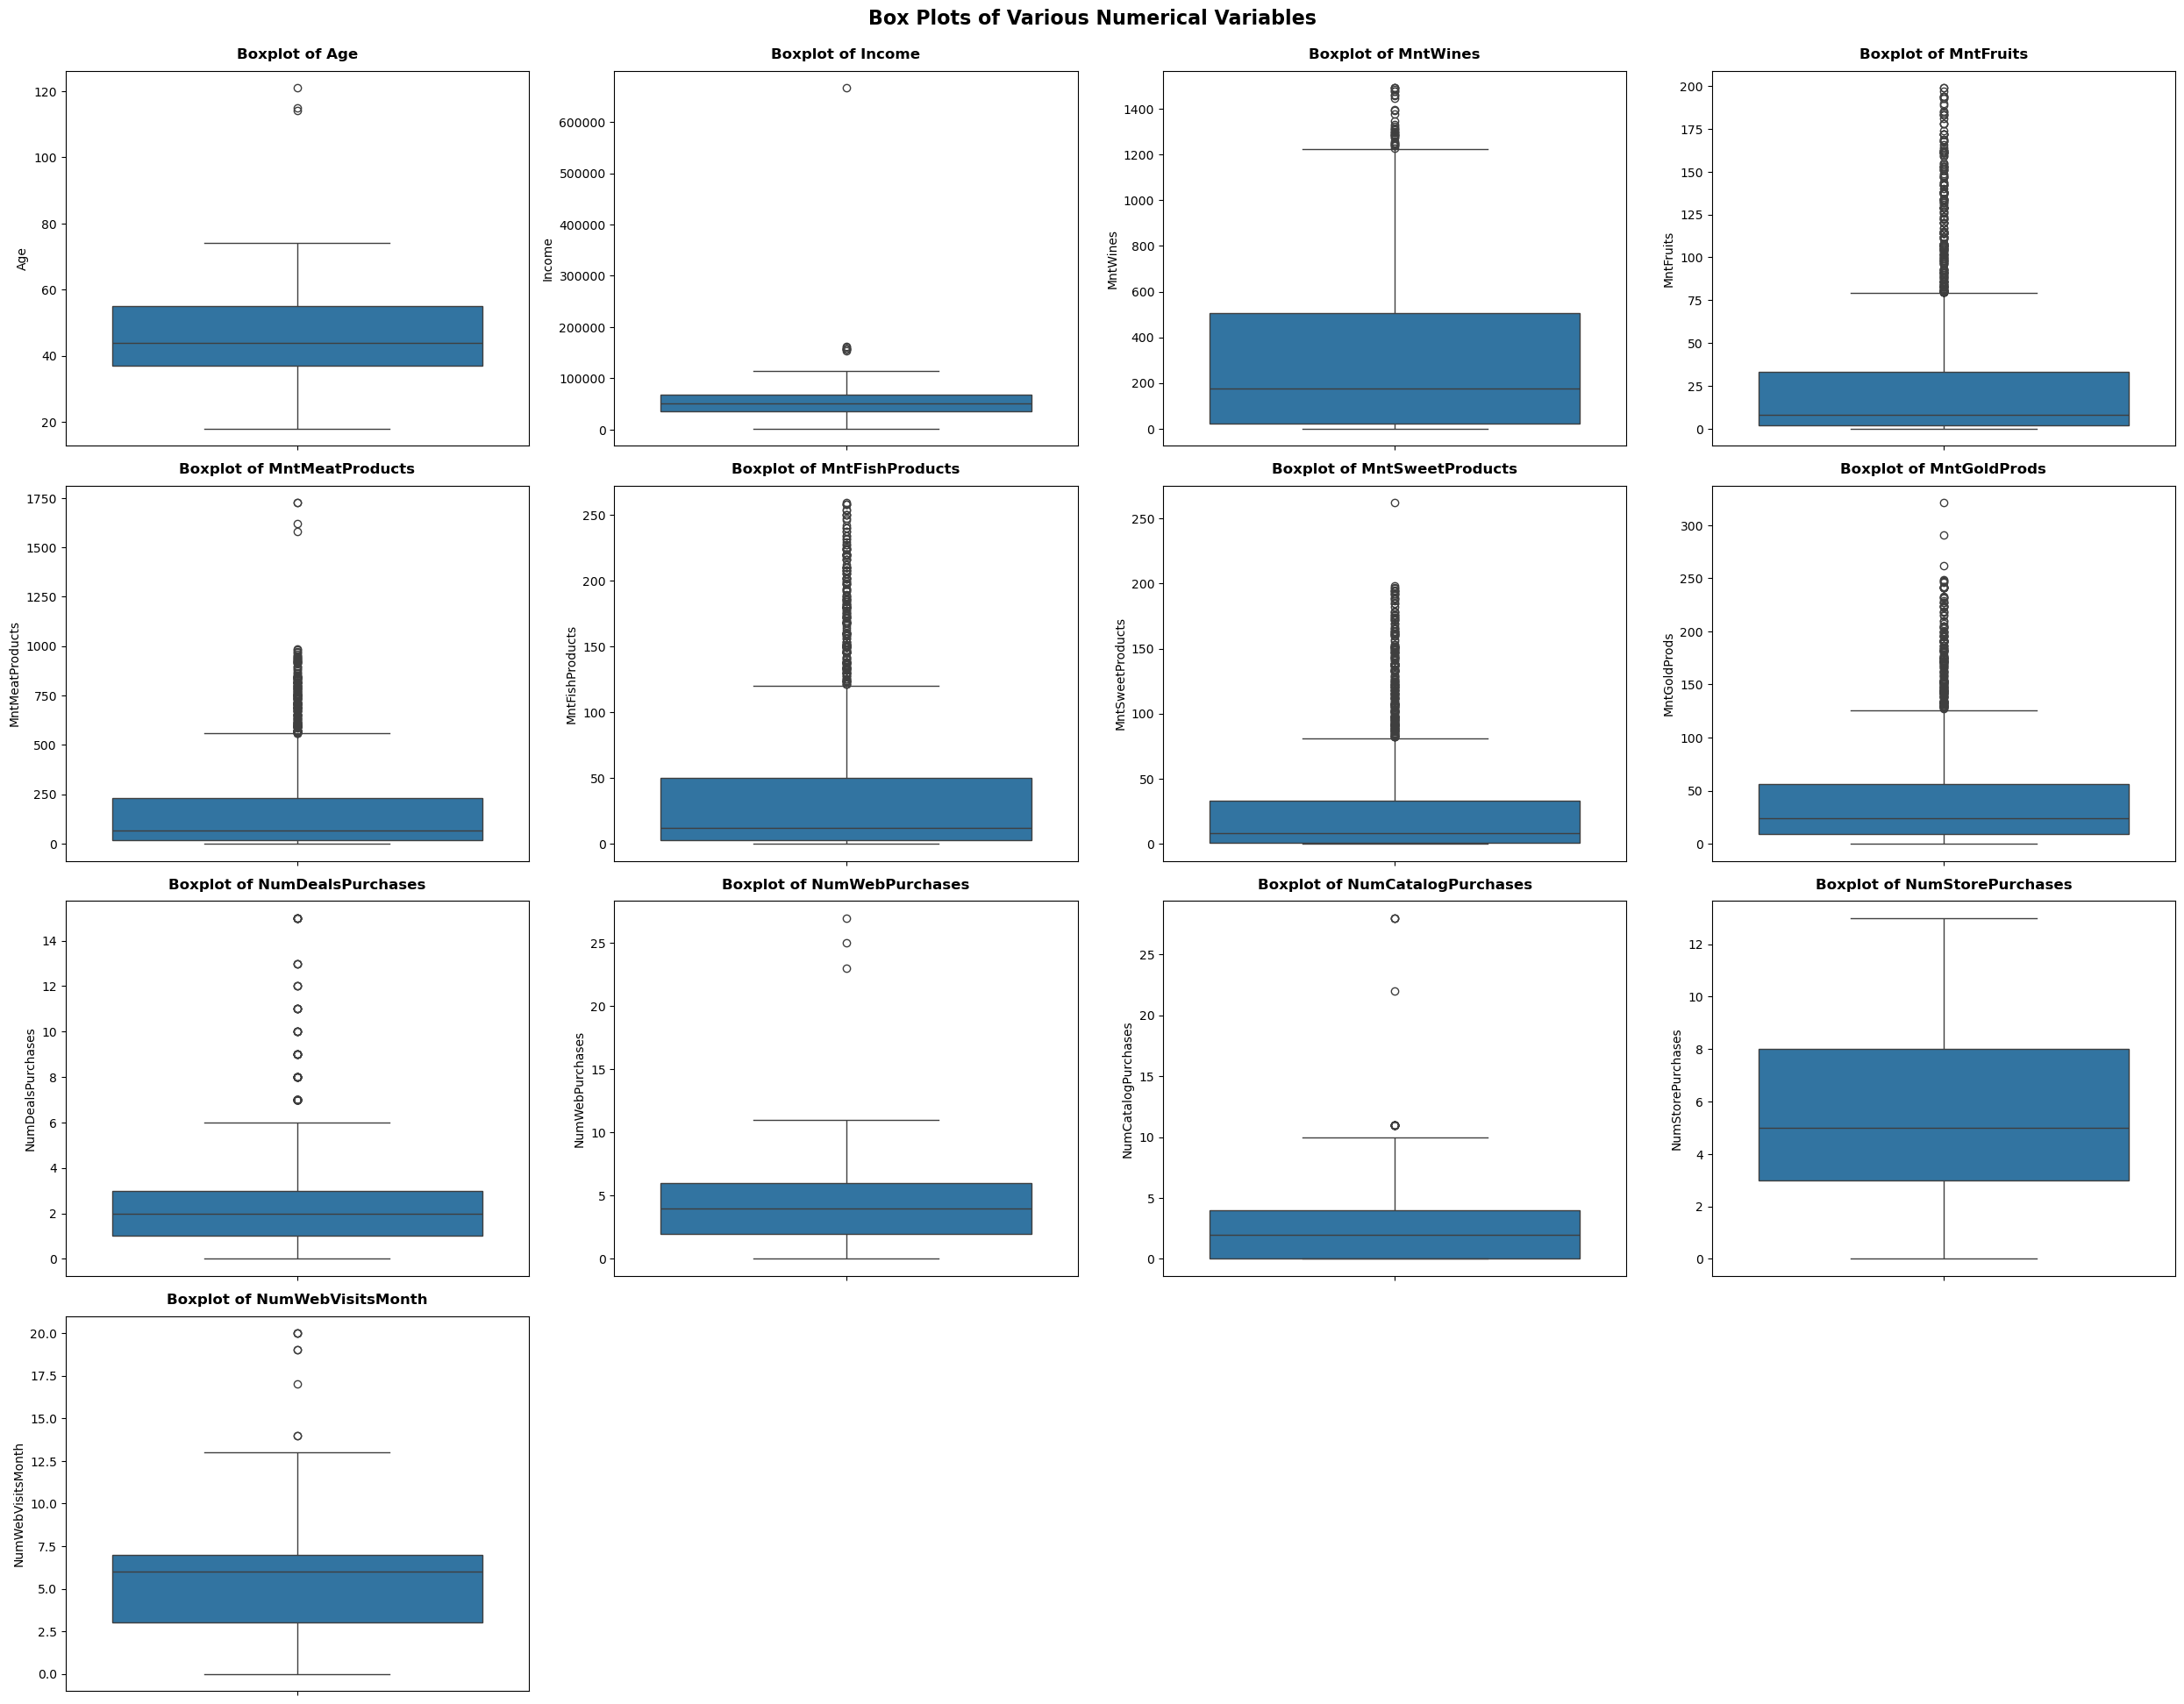

In [51]:
# Daftar kolom yang akan dibuatkan boxplot
columns = ['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Membuat subplot grid sesuai dengan jumlah kolom
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(25, 30))
axes = axes.flatten()

# Loop untuk membuat boxplot untuk setiap kolom
for i, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Hapus subplot kosong jika jumlah kolom kurang dari jumlah subplot yang dibuat
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.suptitle('Box Plots of Various Numerical Variables', fontsize=16, fontweight='bold')
plt.show()

#### Year Birth

In [52]:
# Mencari Outlier di Kolom Year Birth
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
df = df[~((df['Age'] < lower_bound) | (df['Age'] > upper_bound))]

> Outlier pada kolom Age menunjukkan nilai dapat menyebabkan bias dalam hasil analisis. Oleh karena itu, outlier pada Year_Birth perlu dihapus.

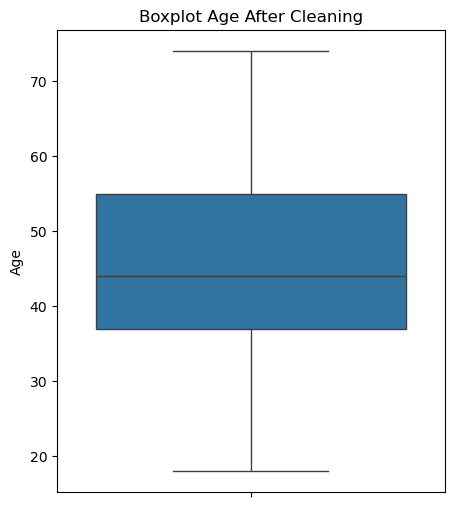

In [53]:
# Menangani Outlier Age
df = df[~((df['Age'] < lower_bound) | (df['Age'] > upper_bound))]
plt.figure(figsize=(5,6))
sns.boxplot(y=df['Age'])
plt.title(f'Boxplot Age After Cleaning')
plt.show()

#### Income

In [54]:
# Mencari Outlier di Kolom Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
count_outlier = outliers.shape[0]
print(f"Outlier di kolom Income:{outliers['Income'].values}")

Outlier di kolom Income:[157243. 162397. 153924. 160803. 157733. 157146. 156924. 666666.]


In [55]:
# Memeriksa data-data yang mengandung outlier income   
df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

,ID,Age,Order_Edu,Order_Status,Income,Dependents,Dt_Customer,Recency,Frequency,Monetary,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAcceptedCmp,Z_CostContact,Z_Revenue
164,8475,41,5.0,2.0,157243.0,1,01-03-2014,98,37,1608,...,0,0,0,0,22,0,0,0,3,11
617,1503,38,5.0,NaN,162397.0,2,03-06-2013,31,1,107,...,0,0,0,0,0,1,1,0,3,11
655,5555,39,3.0,3.0,153924.0,0,07-02-2014,81,0,6,...,0,0,0,0,0,0,0,0,3,11
687,1501,32,5.0,2.0,160803.0,0,04-08-2012,21,44,1717,...,0,0,0,0,28,1,0,0,3,11
1300,5336,43,4.0,NaN,157733.0,1,04-06-2013,37,2,59,...,0,0,0,1,0,1,1,0,3,11
1653,4931,37,3.0,NaN,157146.0,0,29-04-2013,13,28,1730,...,0,0,0,0,28,0,1,0,3,11
2132,11181,65,5.0,2.0,156924.0,0,29-08-2013,85,0,8,...,0,0,0,0,0,0,0,0,3,11
2233,9432,37,3.0,NaN,666666.0,1,02-06-2013,23,11,62,...,0,0,0,3,1,3,6,0,3,11


> Terdapat beberapa outlier dan ektrim outlier pada kolom Income. Namun value yang akan dihapus hanya ekstrim outlier, karena dapat menyebabkan hasil analisis menjadi bias. Oleh karena itu, ekstrim outlier pada Income perlu dihapus.

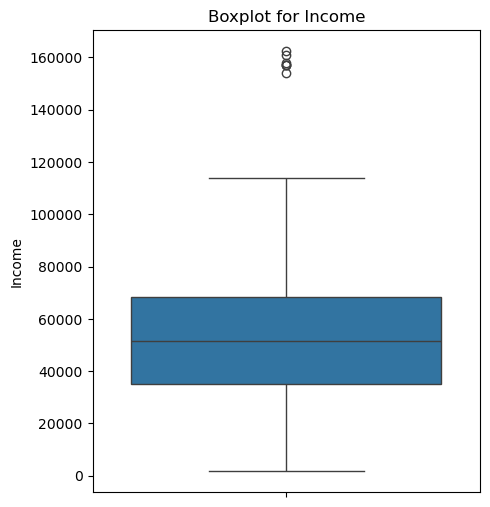

In [56]:
# Menangani ekstrim outlier Income
df = df[~(df['Income'] > 600000)]

# Boxplot Income
plt.figure(figsize=(5,6))
sns.boxplot(y=df['Income'])
plt.title(f'Boxplot for Income')
plt.show()

In [57]:
# Daftar kolom yang akan dicari outliernya dan dibuatkan boxplot
columns = [ 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']

for col in columns:
    # Mencari rentang outlier di kolom
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    count_outlier = outliers.shape[0]
    min_outlier = outliers[col].min()
    max_outlier = outliers[col].max()
    print(f"Rentang nilai outlier di kolom {col}: {min_outlier:.2f} - {max_outlier:.2f}")

Rentang nilai outlier di kolom MntFruits: 80.00 - 199.00
Rentang nilai outlier di kolom MntMeatProducts: 559.00 - 1725.00
Rentang nilai outlier di kolom MntFishProducts: 121.00 - 259.00
Rentang nilai outlier di kolom MntSweetProducts: 82.00 - 262.00
Rentang nilai outlier di kolom MntGoldProds: 127.00 - 321.00
Rentang nilai outlier di kolom NumDealsPurchases: 7.00 - 15.00
Rentang nilai outlier di kolom NumWebPurchases: 23.00 - 27.00
Rentang nilai outlier di kolom NumCatalogPurchases: 11.00 - 28.00
Rentang nilai outlier di kolom NumWebVisitsMonth: 14.00 - 20.00


> Nilai outliers pada kolom diatas masih masuk akal, sehingga tidak perlu didrop.

In [58]:
df.columns

Index(['ID', 'Age', 'Order_Edu', 'Order_Status', 'Income', 'Dependents',
       'Dt_Customer', 'Recency', 'Frequency', 'Monetary', 'Complain',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp6', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'TotalAcceptedCmp',
       'Z_CostContact', 'Z_Revenue'],
      dtype='object')

## 3. Exploratory Data Analysis - EDA

### 3.1 Mengidentifikasi strategi kampanye yang tepat untuk meningkatkan keterlibatan, jumlah penjualan produk.

#### Acceptance Rate

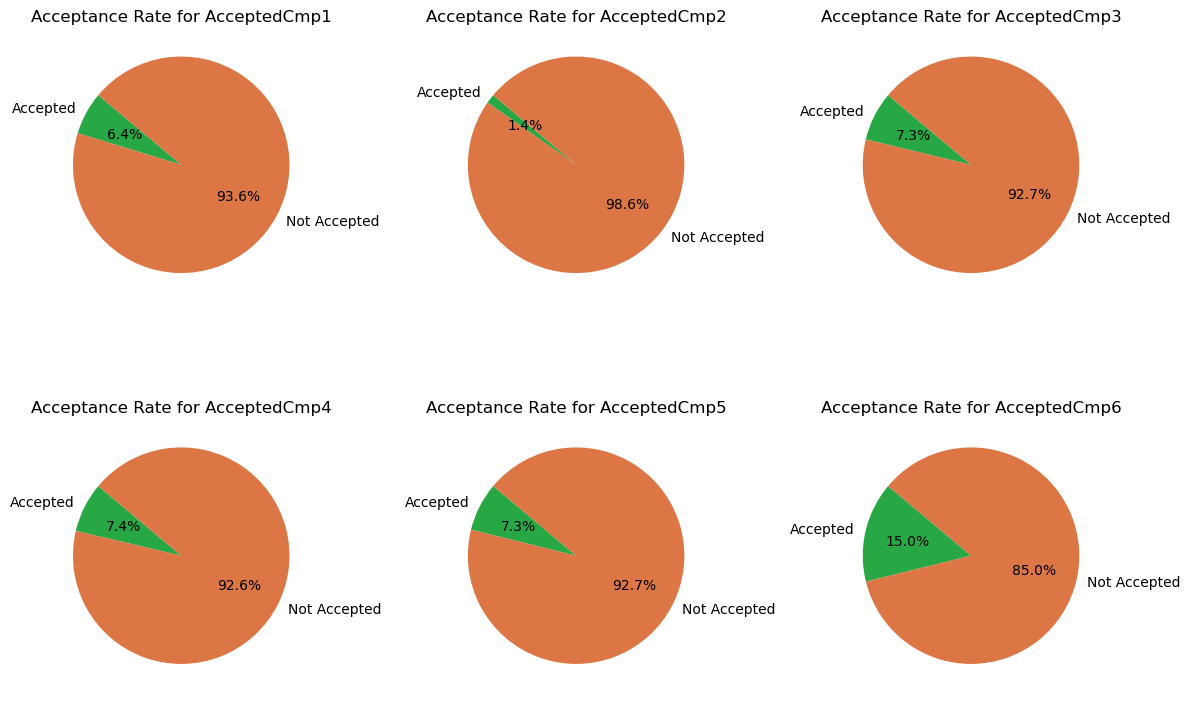

In [59]:
df_roi = df.copy()
df_roi=df_roi[['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                'AcceptedCmp5', 'AcceptedCmp6', 'Z_CostContact', 'Z_Revenue', 'MntWines',
                'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

# Daftar kolom kampanye
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, campaign in enumerate(campaigns):
    accepted_count = df_roi[campaign].sum()
    not_accepted_count = df_roi.shape[0] - accepted_count
    # Data untuk pie chart
    data = [accepted_count, not_accepted_count]
    labels = ['Accepted', 'Not Accepted']
    
    axes[i].pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#28a745', '#dc7645'])
    axes[i].set_title(f'Acceptance Rate for {campaign}')

plt.tight_layout()
plt.show()


> Insight: 
Kampanye 1-5 menunjukkan acceptance rate yang relatif rendah, secara berturut-turut hanya 6.4%, 1.4%, 7.3%, 7.4%, dan 7.3% dari total 2205 pelanggan. Acceptance rate Kampanye 6 menjadi yang tertinggi di antara semua kampanye, yaitu dengan acceptance rate sebesar 15.0% adalah.

#### Analisa ROI per Kampanye

In [60]:
df_roi['TotalAcceptedCmp'] = df_roi[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']].sum(axis=1)
df_roi

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Z_CostContact,Z_Revenue,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAcceptedCmp
0,5524,0,0,0,0,0,1,3,11,635,88,546,172,88,88,1
1,2174,0,0,0,0,0,0,3,11,11,1,6,2,1,6,0
2,4141,0,0,0,0,0,0,3,11,426,49,127,111,21,42,0
3,6182,0,0,0,0,0,0,3,11,11,4,20,10,3,5,0
4,5324,0,0,0,0,0,0,3,11,173,43,118,46,27,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0,0,0,0,0,0,3,11,709,43,182,42,118,247,0
2236,4001,1,0,0,0,0,0,3,11,406,0,30,0,0,8,1
2237,7270,0,0,0,1,0,0,3,11,908,48,217,32,12,24,1
2238,8235,0,0,0,0,0,0,3,11,428,30,214,80,30,61,0


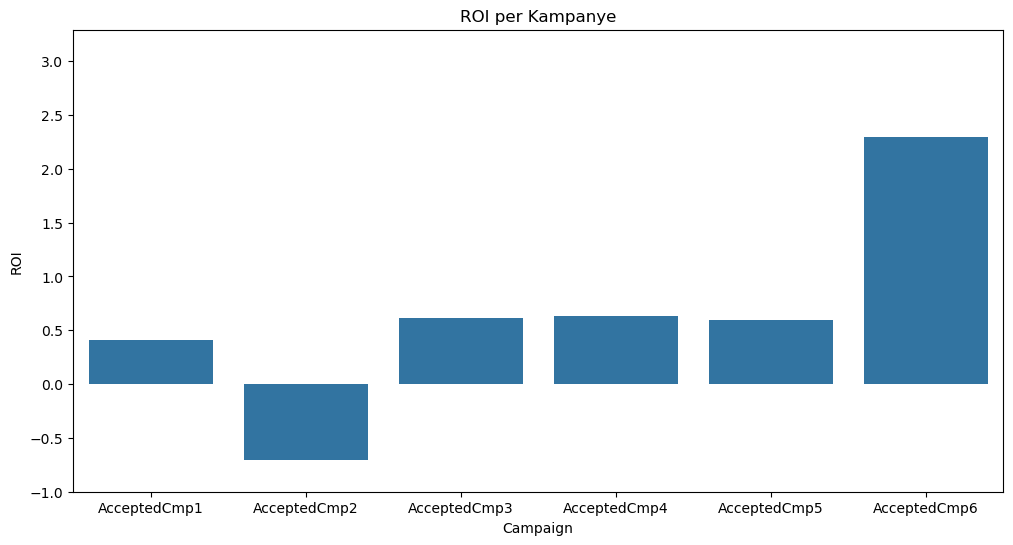

In [61]:
# Menghitung ROI untuk setiap kampanye
Total_Revenue = df_roi['Z_Revenue'].sum()
Revenue_per_acc = df_roi['Z_Revenue'].sum()/(df_roi['ID'].sum()*6)
df_roi['Revenue']=df_roi['ID']*df_roi['TotalAcceptedCmp']
Total_Cost = df_roi['Z_CostContact'].sum()
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']
campaign_metrics = []

for i in campaigns:
    campaign_df_roi = df_roi[df_roi[i] == 1]
    revenue = campaign_df_roi['Z_Revenue'].sum()
    cost = Total_Cost/6
    roi = (revenue - cost) / cost if cost > 0 else 0
    campaign_metrics.append({
        'Campaign': i,
        'Revenue': revenue,
        'Cost': cost,
        'ROI': roi
    })
campaign_df_roi = pd.DataFrame(campaign_metrics)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Campaign', y='ROI', data=campaign_df_roi)
plt.title('ROI per Kampanye')
plt.ylabel('ROI')
plt.ylim(-1, campaign_df_roi['ROI'].max() + 1)
plt.show()


> Insight:
* Kampanye AcceptedCmp6 memiliki ROI tertinggi dibandingkan dengan kampanye lainnya, yang menunjukkan bahwa kampanye ini lebih efektif dalam menghasilkan laba atas investasi dibandingkan kampanye lainnya.
* AcceptedCmp2 menunjukkan ROI yang negatif, yang berarti kampanye ini mungkin tidak menghasilkan laba yang diharapkan atau bahkan mengalami kerugian.
* Kampanye AcceptedCmp1, AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5 memiliki ROI yang relatif serupa, menunjukkan bahwa kampanye ini mungkin cukup seimbang dalam hal laba yang dihasilkan.

#### Mengidentifikasi Pola Keterlibatan Kampanye terhadap Jumlah Pembelian Produk

In [62]:
numeric_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp6', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Melakukan uji kenormalan untuk setiap kolom
for col in numeric_cols:
        stat, p = shapiro(df_roi[col])
        if p > 0.05:
            print(f'Kolom {col} memuat data yang berdistribusi normal.')
        else:
            print(f'Kolom {col} memuat data yang tidak berdistribusi normal.')


Kolom AcceptedCmp1 memuat data yang tidak berdistribusi normal.
Kolom AcceptedCmp2 memuat data yang tidak berdistribusi normal.
Kolom AcceptedCmp3 memuat data yang tidak berdistribusi normal.
Kolom AcceptedCmp4 memuat data yang tidak berdistribusi normal.
Kolom AcceptedCmp5 memuat data yang tidak berdistribusi normal.
Kolom AcceptedCmp6 memuat data yang tidak berdistribusi normal.
Kolom MntWines memuat data yang tidak berdistribusi normal.
Kolom MntFruits memuat data yang tidak berdistribusi normal.
Kolom MntMeatProducts memuat data yang tidak berdistribusi normal.
Kolom MntFishProducts memuat data yang tidak berdistribusi normal.
Kolom MntSweetProducts memuat data yang tidak berdistribusi normal.
Kolom MntGoldProds memuat data yang tidak berdistribusi normal.


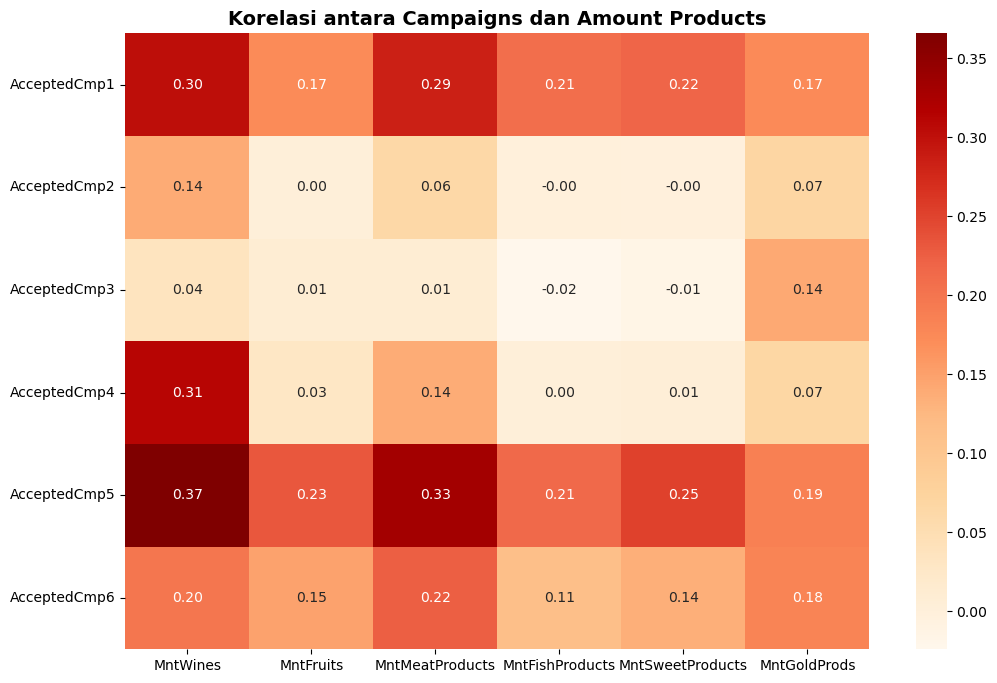

In [63]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']
product_cols =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Menghitung korelasi antara setiap campaign dan setiap product
correlation_results = pd.DataFrame(index=campaign_cols, columns=product_cols)

for campaign in campaign_cols:
    for product in product_cols:
        correlation_results.loc[campaign, product] = df_roi[campaign].corr(df_roi[product], method='spearman')

correlation_results = correlation_results.astype(float)

# Menampilkan hasil dalam bentuk heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_results, annot=True, fmt=".2f", cmap='OrRd', cbar=True)
plt.title('Korelasi antara Campaigns dan Amount Products', fontsize=14, fontweight='bold')
plt.show()

> Insight:
* AcceptedCmp5 memiliki korelasi yang relatif lebih tinggi dengan pengeluaran untuk produk-produk seperti MntWines, MntMeatProducts, MntSweetProducts, dan MntGoldProds, menunjukkan bahwa kampanye ini memiliki dampak yang lebih kuat terhadap keputusan konsumen untuk membeli produk-produk tersebut.
* AcceptedCmp1 dan AcceptedCmp4 juga menunjukkan beberapa hubungan dengan produk tertentu seperti MntWines dan MntMeatProducts, meskipun korelasinya tidak sebesar AcceptedCmp5.
* AcceptedCmp2 memiliki korelasi yang rendah dengan hampir semua kategori produk, yang sejalan dengan ROI yang negatif yang terlihat pada grafik pertama. Ini bisa menunjukkan bahwa kampanye ini kurang berhasil dalam mendorong pembelian produk.

### 3.2 Segmentasi Pelanggan dengan Analisis RFM

In [64]:
df_rfm = df.copy()

# Assign R, F, M scores
df_rfm['R_score'] = pd.qcut(df_rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1]).astype(int)
df_rfm['F_score'] = pd.qcut(df_rfm['Frequency'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)
df_rfm['M_score'] = pd.qcut(df_rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)

# Combine R, F, M scores to create RFM Score
df_rfm['RFM Score'] = df_rfm['R_score'].astype(str) + df_rfm['F_score'].astype(str) + df_rfm['M_score'].astype(str)
df_rfm['RFM Score'] = df_rfm['RFM Score'].astype(int)  # Convert to integer for comparison

# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    segment = []
    for score in col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = 'null'
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
df_rfm['Segment'] = assign_cust_seg(df_rfm['RFM Score'])
df_rfm.sample(5)


,ID,Age,Order_Edu,Order_Status,Income,Dependents,Dt_Customer,Recency,Frequency,Monetary,...,NumStorePurchases,NumWebVisitsMonth,TotalAcceptedCmp,Z_CostContact,Z_Revenue,R_score,F_score,M_score,RFM Score,Segment
1031,9220,43,3.0,1.0,91700.0,0,17-01-2013,58,20,1968,...,5,3,1,3,11,3,4,5,345,Loyal Customer
82,5346,41,4.0,2.0,23559.0,1,03-07-2013,87,9,79,...,3,7,0,3,11,1,2,2,122,Hibernating
707,6991,63,3.0,3.0,43185.0,1,10-04-2013,88,20,637,...,6,8,0,3,11,1,4,3,143,At Risk
1288,9010,42,4.0,2.0,83151.0,0,10-02-2013,80,23,2346,...,10,2,4,3,11,1,5,5,155,Cannot Lose Them
49,6566,60,5.0,2.0,72550.0,2,08-11-2012,39,28,1319,...,12,8,0,3,11,4,5,5,455,Champion


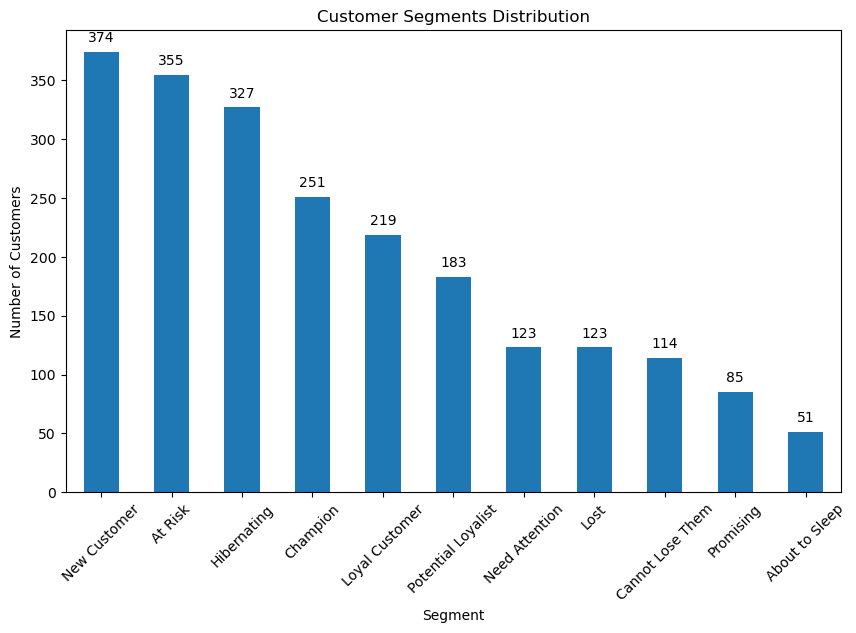

In [65]:
plt.figure(figsize=(10, 6))
ax = df_rfm['Segment'].value_counts().plot(kind='bar')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

* **Champions:** Pelanggan dengan skor tertinggi dalam hal frekuensi, nilai pembelian, dan terakhir kali melakukan pembelian.
* **Loyal Customers:** Pelanggan dengan frekuensi dan nilai pembelian yang baik serta sering melakukan pembelian.
* **Potential Loyalists:** Pelanggan baru dengan frekuensi dan nilai pembelian yang sedang.
* **New Customers:** Pelanggan yang baru saja melakukan pembelian tetapi tidak sering.
* **Promising:** Pembeli baru yang belum menghabiskan banyak uang.
* **Need Attention:** Pelanggan dengan frekuensi, nilai pembelian, dan aktivitas yang di atas rata-rata, tetapi perlu dihubungi kembali.
* **About to Sleep:** Pelanggan dengan frekuensi, nilai pembelian, dan aktivitas di bawah rata-rata.
* **At Risk:** Pelanggan yang dulunya aktif tetapi belum melakukan pembelian baru-baru ini.
* **Can’t Lose Them:** Pelanggan yang pernah melakukan pembelian besar tetapi tidak dalam waktu dekat.
* **Hibernating:** Pelanggan dengan frekuensi dan nilai pembelian yang rendah, yang belum aktif dalam waktu lama.
* **Lost:** Pelanggan dengan frekuensi, nilai pembelian, dan aktivitas yang paling rendah.

> Insight:
Segmen "New Customer" memiliki jumlah pelanggan terbanyak (374), diikuti oleh segmen "At Risk" (355) dan "Hibernating" (327). Ini menunjukkan bahwa perusahaan memiliki banyak pelanggan baru, namun juga banyak pelanggan yang berisiko hilang dan sedang dalam kondisi tidak aktif. Diperlukan adanya strategi untuk mempertahankan segmen "At Risk" dan "Hibernating," seperti memberikan penawaran khusus atau program loyalitas yang disesuaikan untuk menghidupkan kembali minat mereka terhadap produk dan layanan perusahaan.

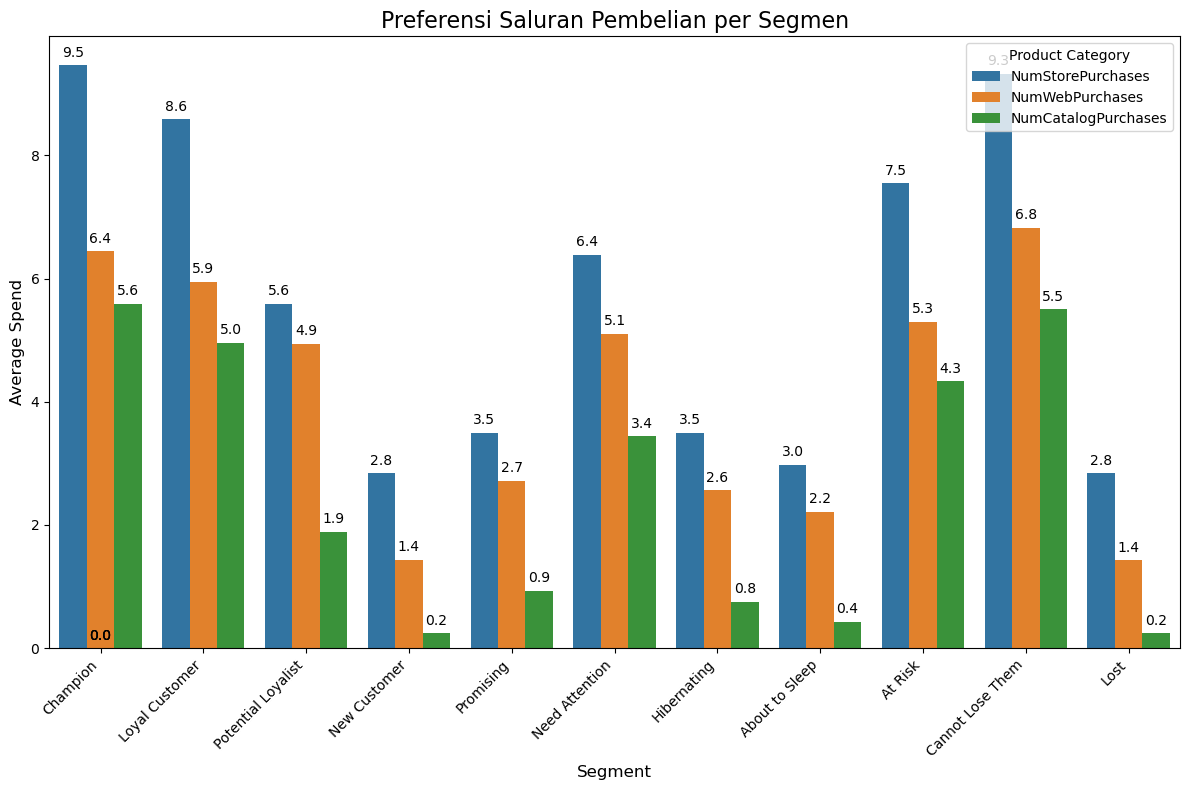

In [66]:
channel_cols = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
segment = ['Champion', 'Loyal Customer', 'Potential Loyalist', 'New Customer', 
        'Promising', 'Need Attention', 'Hibernating', 'About to Sleep', 'At Risk',
        'Cannot Lose Them', 'Hibernating', 'Lost']


channel_preferences = df_rfm.groupby('Segment')[channel_cols].mean().reset_index()
df_melted = pd.melt(channel_preferences, id_vars='Segment', value_vars=channel_cols, 
                    var_name='Product Category', value_name='Average Spend')

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Segment', y='Average Spend', hue='Product Category', data=df_melted, order=segment)
plt.title('Preferensi Saluran Pembelian per Segmen', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Spend', fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.legend(title='Product Category', loc='upper right')
plt.tight_layout()

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()


> Insight: 
* Secara umum, setiap segmen menunjukkan pola yang konsisten di mana saluran pembelian yang paling diminati adalah pembelian langsung ke toko, diikuti oleh pembelian melalui web, dan terakhir melalui katalog.
* Saluran dengan Preferensi Tertinggi: Segmen Champion dan Loyal Customer memiliki rata-rata pengeluaran tertinggi untuk pembelian di toko, menunjukkan keterlibatan yang kuat dan preferensi yang jelas terhadap interaksi langsung dengan produk di toko fisik.
* Saluran dengan Preferensi Terendah: Segmen Lost memiliki rata-rata pengeluaran terendah di semua saluran, terutama di katalog, menunjukkan bahwa pelanggan dalam segmen ini hampir tidak berinteraksi lagi dengan brand, baik secara online maupun offline.

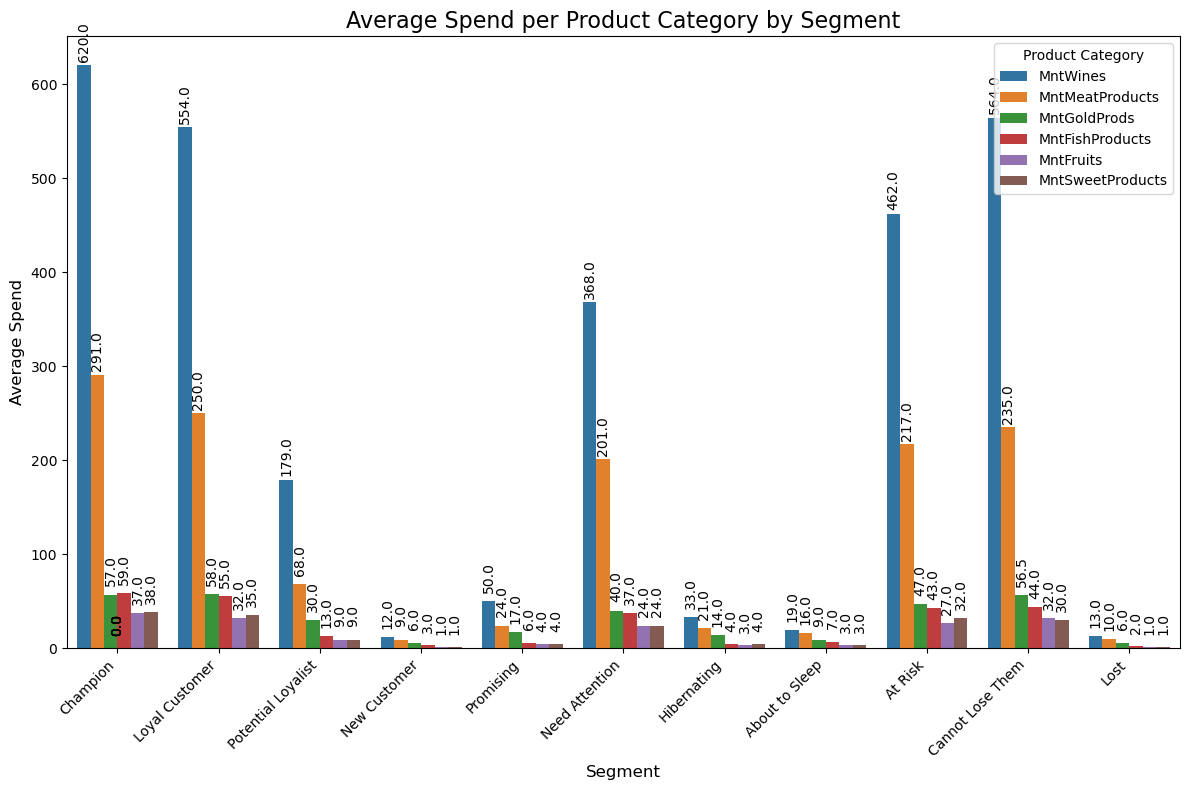

In [67]:
product_cols = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntFruits', 'MntSweetProducts']
segment = ['Champion', 'Loyal Customer', 'Potential Loyalist', 'New Customer', 
        'Promising', 'Need Attention', 'Hibernating', 'About to Sleep', 'At Risk',
        'Cannot Lose Them', 'Hibernating', 'Lost']

# Menghitung median pengeluaran per segmen dan produk
product_preferences = df_rfm.groupby('Segment')[product_cols].median().reset_index()

df_melted = pd.melt(product_preferences, id_vars='Segment', value_vars=product_cols, 
                var_name='Product Category', value_name='Average Spend')

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Segment', y='Average Spend', hue='Product Category', data=df_melted, order=segment)
plt.title('Average Spend per Product Category by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Spend', fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.legend(title='Product Category', loc='upper right')
plt.tight_layout()

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 17), 
                textcoords = 'offset points',
                rotation=90)

plt.show()

> Insight:
* Secara umum, setiap segmen menunjukkan pola yang konsisten di mana kategori produk yang paling diminati adalah MntWines, diikuti oleh MntMeatProducts, sementara kategori produk lainnya seperti MntFruits dan MntSweetProducts cenderung memiliki pengeluaran yang lebih rendah.
* Kategori Produk dengan Pengeluaran Tertinggi: Segmen Champion dan Loyal Customer memiliki pengeluaran tertinggi pada kategori MntWines, masing-masing mencapai 620 dan 554. Ini menunjukkan preferensi yang kuat terhadap produk wine dalam dua segmen yang paling loyal ini.
* Kategori Produk dengan Pengeluaran Terendah: Pengeluaran terendah terlihat pada kategori MntFruits dan MntSweetProducts di sebagian besar segmen, termasuk segmen Lost dan About to Sleep, dengan pengeluaran rata-rata mendekati 0. Hal ini menunjukkan bahwa produk buah dan permen kurang diminati atau dianggap kurang penting oleh pelanggan dalam segmen-segmen ini.

## 4. Conclusion and Recommendations

Berdasarkan berbagai insight yang diperoleh dari analisis kampanye pemasaran dan pola perilaku pelanggan, dapat disimpulkan beberapa poin penting sebagai berikut:

1. Efektivitas Kampanye Pemasaran: 
    Kampanye AcceptedCmp6 adalah yang paling efektif dengan acceptance rate tertinggi sebesar 15% dan ROI tertinggi dibandingkan dengan kampanye lainnya. Ini menunjukkan bahwa strategi yang digunakan dalam kampanye ini lebih berhasil dalam menarik minat pelanggan dan menghasilkan laba yang lebih baik. Sebaliknya, AcceptedCmp2 menunjukkan ROI negatif dan acceptance rate yang sangat rendah, menunjukkan bahwa kampanye ini kurang efektif dan berpotensi merugikan perusahaan.
2. Korelasi Antara Kampanye dan Pengeluaran Produk:
    AcceptedCmp5 memiliki korelasi yang kuat dengan pengeluaran pada produk-produk seperti MntWines, MntMeatProducts, MntSweetProducts, dan MntGoldProds, yang berarti kampanye ini berhasil mendorong pelanggan untuk membeli produk-produk tersebut.Kampanye lainnya, seperti AcceptedCmp1 dan AcceptedCmp4, juga menunjukkan beberapa korelasi dengan produk tertentu, tetapi tidak sekuat AcceptedCmp5.
3. Pola Perilaku Pelanggan dan Retensi:
    Segmen "New Customer" memiliki jumlah pelanggan terbanyak, tetapi segmen "At Risk" dan "Hibernating" menunjukkan jumlah yang signifikan, yang mengindikasikan adanya risiko kehilangan pelanggan jika tidak ada tindakan yang diambil. Segmen "Champion" dan "Loyal Customer" lebih cenderung melakukan pembelian di toko fisik dan memiliki pengeluaran tertinggi pada kategori produk MntWines, menunjukkan bahwa segmen-segmen ini adalah pelanggan yang sangat berharga yang perlu dipertahankan.
4. Preferensi Saluran Pembelian:
    Pembelian di toko fisik adalah saluran yang paling diminati oleh segmen-segmen utama, diikuti oleh pembelian melalui web, dan terakhir katalog. Segmen "Lost" hampir tidak menunjukkan aktivitas di semua saluran, menunjukkan disengagement yang signifikan.

`Rekomendasi`
1. Optimalisasi Kampanye Pemasaran:
    * Fokuskan investasi pada kampanye yang terbukti efektif, seperti AcceptedCmp6, dan pertimbangkan untuk meniru strategi yang digunakan dalam kampanye ini di kampanye lainnya.
    * Kampanye AcceptedCmp2 perlu dievaluasi ulang atau bahkan dihentikan, karena menunjukkan ROI yang negatif dan tidak efektif dalam menarik pelanggan.
    * Kampanye AcceptedCmp5 bisa dipertahankan dan diperluas, terutama untuk produk-produk seperti MntWines dan MntMeatProducts, yang telah terbukti memberikan hasil yang baik.
2. Peningkatan Keterlibatan Pelanggan:
    * Segmen "At Risk" dan "Hibernating" harus menjadi fokus utama dalam upaya retensi. Pertimbangkan untuk memberikan penawaran khusus, diskon personal, atau program loyalitas yang dapat menghidupkan kembali minat mereka terhadap produk dan layanan perusahaan.
    * Kampanye reaktivasi yang menargetkan segmen "Lost" harus difokuskan pada produk-produk favorit sebelumnya, seperti wine dan produk daging, dengan penawaran yang sangat menarik untuk mencoba mengembalikan mereka.
3. Penguatan Saluran Pembelian:
    * Mengingat preferensi yang tinggi terhadap pembelian di toko fisik, strategi pemasaran harus terus memperkuat pengalaman berbelanja di toko. Ini bisa mencakup program loyalitas yang hanya bisa diakses di toko, promosi eksklusif, atau event khusus di lokasi fisik.
    * Pembelian melalui web bisa ditingkatkan dengan menambahkan fitur-fitur yang memudahkan pembelian online, seperti penawaran spesial hanya di web, layanan pengiriman cepat, atau integrasi yang lebih baik antara pengalaman berbelanja di toko dan online (misalnya, opsi pick-up in-store).
4. Diversifikasi Penawaran Produk:
    * Produk-produk dengan pengeluaran rendah, seperti MntFruits dan MntSweetProducts, dapat dipromosikan lebih agresif melalui bundling dengan produk yang lebih populer atau melalui kampanye edukasi yang menekankan manfaat produk-produk tersebut. Untuk meningkatkan daya tarik kategori produk yang kurang diminati, pertimbangkan untuk melakukan kampanye yang menargetkan kelompok pelanggan tertentu yang mungkin lebih menghargai produk tersebut, seperti segmen "New Customer" atau "Potential Loyalist."
